<a href="https://colab.research.google.com/github/Shanz1465/Curso-Python-Machine-Learning-con-Datos-Atmosfericos-UAM-I/blob/main/machine_learning_con_datos_atmosfericos_uam_i.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Semana 2 de curso machine learning UAM-I
Datos atmosfericos

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/jamc88/Analisis-datos-atmosfericos/refs/heads/main/datos/rama_2023_05.csv")

In [ ]:
data

,fecha,CO,NO,NO2,NOX,O3,PM10,PM25,SO2
0,2015-01-01,1.050696,22.765528,24.225155,46.987578,23.175150,105.573684,78.953405,11.554723
1,2015-01-02,0.807585,32.249608,21.554160,53.800628,17.268366,36.687845,15.449438,1.895052
2,2015-01-03,0.640755,21.686916,19.394081,41.071651,15.486486,29.269022,12.915129,1.436937
3,2015-01-04,0.726940,24.606272,19.560976,44.165505,17.329032,39.961538,16.838284,1.809061
4,2015-01-05,0.530815,11.443182,20.990260,32.439935,14.470588,31.855643,12.667774,8.315789
...,...,...,...,...,...,...,...,...,...
3068,2023-05-27,0.256722,3.750583,17.284351,21.629371,41.580645,36.774011,21.170139,2.735683
3069,2023-05-28,0.286826,3.458886,16.349241,20.230769,36.913761,28.580000,18.454861,2.331658
3070,2023-05-29,0.482077,11.448113,24.521154,36.436321,29.697068,30.241486,16.692857,1.071588
3071,2023-05-30,0.441455,13.893519,22.615530,37.224537,36.185971,35.859532,20.888525,1.181818


In [ ]:
pip install scikit-learn

In [ ]:
X=data[["CO","NOX","PM25","SO2"]] # Variable independiente
y=data["PM10"] #Variable dependiente

In [ ]:
split_index= int(len(data)*0.8)

In [ ]:
X_train=X.iloc[:split_index]
X_test= X.iloc[split_index:]
y_train=y.iloc[:split_index]
y_test=y.iloc[split_index:]

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
coeficientes= pd.DataFrame({
    "Variable":X.columns,
    "Coeficiente":model.coef_
})

In [ ]:
print(coeficientes)

  Variable  Coeficiente
0       CO   -21.240472
1      NOX     0.530047
2     PM25     1.341258
3      SO2     0.122226


In [ ]:
print(f"intercepto:{model.intercept_}")

intercepto:2.542471488012616


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
r2= r2_score(y_test, y_pred)

In [ ]:
r2

0.7494314866330515

In [ ]:
rmse=mean_squared_error(y_test, y_pred, squared=False)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
rmse

7.149329038511094

In [ ]:
mae=mean_absolute_error(y_test, y_pred)

In [ ]:
mae

5.463133609444374

In [ ]:
y_pred

array([31.38002881, 37.86450851, 32.04174414, 26.0631386 , 33.5333308 ,
       42.05139907, 40.14043928, 29.99883337, 36.74335268, 21.76294946,
       19.3049341 , 17.56171307, 23.44982476, 29.76943116, 29.36952081,
       34.52061101, 20.06627078, 34.39087261, 33.08816623, 34.58422105,
       40.05360016, 35.45067444, 23.9899229 , 13.97945307, 30.74979421,
       35.30842121, 49.41866435, 23.17090231, 22.36419371, 39.87602679,
       22.72771426, 35.22740105, 33.26176002, 27.6873052 , 46.75531003,
       53.96682474, 47.14756127, 38.33097827, 40.52208719, 35.34494686,
       46.00862321, 47.72503412, 43.38116545, 39.30906491, 30.53299751,
       41.29068002, 52.48091463, 52.25544764, 42.34265178, 34.80613239,
       31.28221483, 30.38697676, 31.17733714, 44.00940911, 46.81459584,
       45.92792275, 26.58188832, 32.50082829, 34.72659384, 32.48913447,
       26.32497217, 38.62973209, 51.37690293, 37.44124484, 52.56188205,
       49.66050962, 47.99784311, 48.7994119 , 42.63969231, 36.32

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
residuos= y_test - y_pred

Text(0, 0.5, 'Frecuencia')

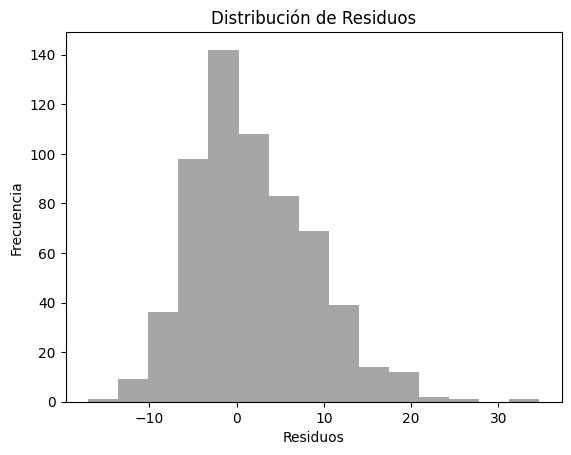

In [ ]:
plt.hist(residuos, bins=15, color="gray", alpha=0.7)
plt.title("Distribución de Residuos")
plt.xlabel("Residuos")
plt.ylabel("Frecuencia")

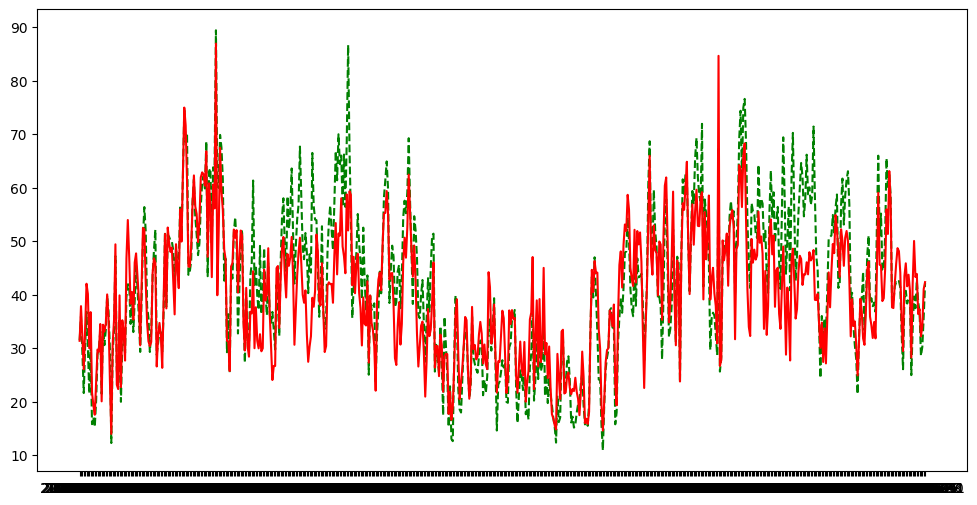

In [ ]:
plt.figure(figsize=[12,6])
plt.plot(data.iloc[split_index:]["fecha"], y_test, linestyle="--", color="green")
plt.plot(data.iloc[split_index:]["fecha"], y_pred, linestyle="-", color="red")

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [ ]:
data=data.sort_values(by='fecha') #ordena por fecha
split_index=int(len(data)*0.8)
X_train=X.iloc[:split_index]
X_test=X.iloc[split_index:]
y_train=y.iloc[:split_index]
y_test=y.iloc[split_index:]

In [ ]:
rf_model=RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, random_state=42)

In [ ]:
y_pred=rf_model.predict(X_test)

In [ ]:
y_pred

array([28.45958223, 35.84405187, 32.78519543, 22.04449628, 30.3219211 ,
       39.59195359, 33.57343287, 28.85780881, 29.34448538, 25.68293822,
       18.50638119, 16.33951587, 22.39781599, 28.61078298, 28.226488  ,
       36.50741639, 21.72020415, 33.37929774, 35.65170635, 37.1085236 ,
       36.46156083, 33.43810243, 27.19443573, 15.79863815, 27.8632044 ,
       36.46212463, 51.43640364, 28.52556521, 21.5303454 , 41.03788942,
       23.75317438, 39.50493804, 35.22303135, 22.79617964, 46.58807428,
       53.31599469, 47.48214805, 36.60206996, 38.94516861, 36.29316065,
       47.10987412, 48.35134829, 41.07227619, 41.02776808, 28.52769265,
       42.6839416 , 57.18200043, 52.61661213, 44.59601179, 33.16073408,
       32.96303684, 30.29813507, 28.35747974, 46.90495375, 48.76999535,
       47.36013615, 22.98914982, 27.9745026 , 30.2801517 , 32.59180569,
       24.38751232, 39.51800403, 51.28180803, 36.64334959, 51.60815377,
       47.35269687, 48.04643353, 47.86461305, 42.46345927, 36.81

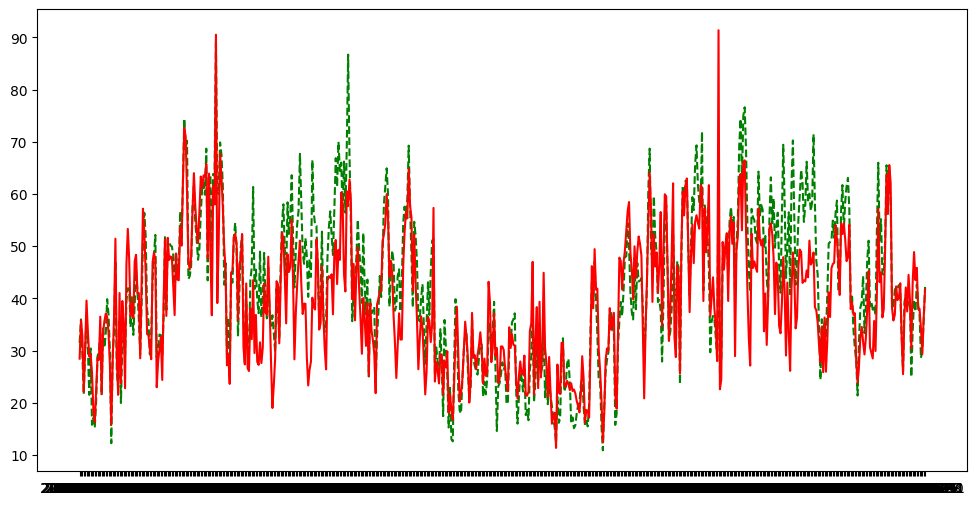

In [ ]:
plt.figure(figsize=[12,6])
plt.plot(data.iloc[split_index:]["fecha"], y_test, linestyle="--", color="green")
plt.plot(data.iloc[split_index:]["fecha"], y_pred, linestyle="-", color="red")

# Clase 2 Machine Learning (SVR)

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
# from sklearn.features_selection import SelectkBest, f_regression

In [ ]:
data= pd.read_csv("https://raw.githubusercontent.com/jamc88/Analisis-datos-atmosfericos/refs/heads/main/datos/rama_2023_05.csv")

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [ ]:
X= data [["NO", "PM25"]]
y= data["PM10"] #Variable objetivo

In [ ]:
split_index = int (len(data)*0.8)
X_train=X.iloc[:split_index]
X_test=X.iloc[split_index:]
y_train=y.iloc[:split_index]
y_test=y.iloc[split_index:]

In [ ]:
scaler= StandardScaler()
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)

In [ ]:
svr_model= SVR(kernel="rbf", C=1.0, epsilon=0.1)
svr_model.fit(X_train_scaled, y_train)

SVR()

In [ ]:
y_test_pred= svr_model.predict(X_test_scaled)

In [ ]:
y_test_pred

array([27.40761917, 35.77793633, 32.17429679, 22.82518235, 30.48430695,
       41.11594173, 37.58428436, 28.09167337, 37.97537459, 23.91286787,
       19.20328149, 18.82442937, 21.19763671, 27.36263668, 25.53968469,
       33.993949  , 19.66838841, 33.65115323, 31.98673445, 34.8672092 ,
       40.043503  , 33.25375081, 21.78407896, 20.94532471, 28.91295932,
       33.35456443, 49.15430622, 20.72209997, 20.36709571, 38.68956257,
       21.27436979, 42.64025845, 38.3963939 , 28.35836922, 47.08577752,
       52.62871896, 43.30089722, 36.27219649, 36.45515416, 30.38567287,
       42.74125803, 42.05070895, 38.25157147, 33.90690986, 25.88341386,
       36.67566441, 47.40008916, 48.39883073, 37.43617287, 28.27971234,
       26.49897309, 27.27665678, 25.41516366, 40.04589406, 42.03444668,
       41.80978603, 22.10144211, 27.46457306, 32.31344689, 28.35958602,
       22.32938689, 36.24948179, 51.15879227, 34.23562239, 50.93611281,
       50.6372418 , 46.17460214, 46.46979322, 40.9436209 , 36.06

In [ ]:
test_mse=mean_squared_error(y_test, y_test_pred)
test_r2= r2_score(y_test, y_test_pred)

In [ ]:
test_mse

63.310573032474885

In [ ]:
test_r2

0.6896354071907487

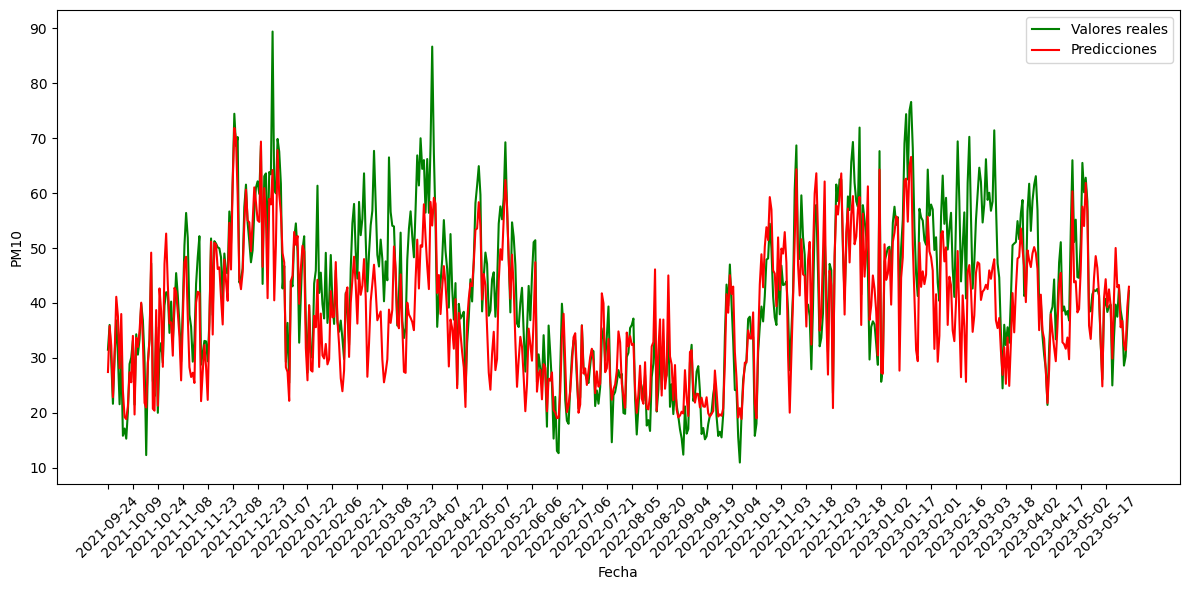

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(data.iloc[split_index:]["fecha"],  y_test, label="Valores reales" ,color="green")
plt.plot(data.iloc[split_index:]["fecha"], y_test_pred,label="Predicciones" ,color="red")
plt.xlabel("Fecha")
plt.ylabel("PM10")
plt.legend()

plt.xticks(data.iloc[split_index:]["fecha"][::15], rotation=45)
plt.tight_layout()
plt.show()

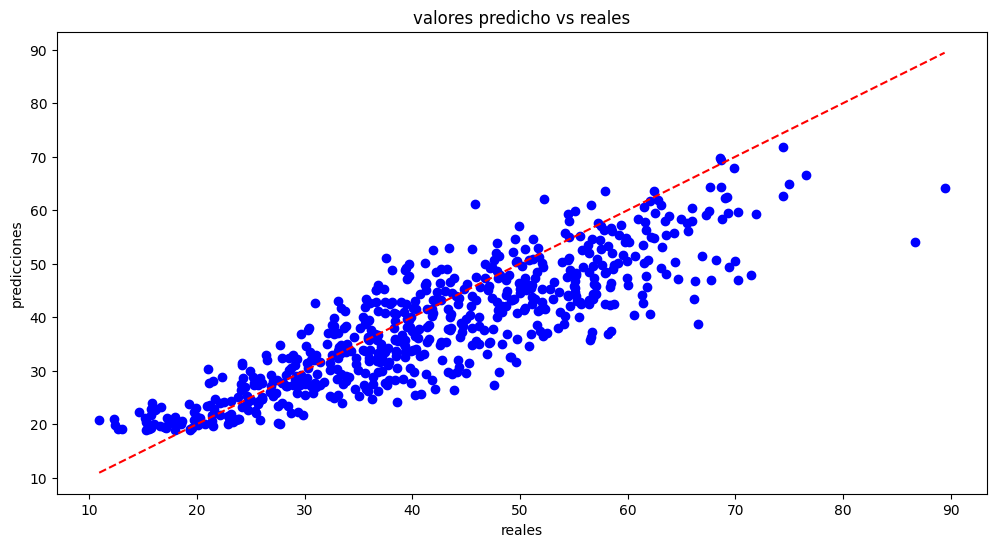

In [ ]:
plt.figure(figsize=[12,6])
plt.scatter(y_test, y_test_pred, color="blue")
plt.plot([y_test.min(),y_test.max()],[y_test.min(), y_test.max()], "r--", label="linea ideal")
plt.title("valores predicho vs reales")
plt.xlabel("reales")
plt.ylabel("predicciones")
plt.show()

# Aumento de variables Temporales

In [ ]:
data["fecha"]=pd.to_datetime(data["fecha"])

In [ ]:
data["mes"]=data["fecha"].dt.month

In [ ]:
data["dia"]=data["fecha"].dt.day

In [ ]:
data["dia_de_semana"]=data["fecha"].dt.dayofweek

In [ ]:
data["fin_de_semana"]=(data["fecha"].dt.dayofweek>=5).astype(int)

In [ ]:
data.head(25)

,fecha,CO,NO,NO2,NOX,O3,PM10,PM25,SO2,mes,dia,dia_de_semana,fin_de_semana
0,2015-01-01,1.050696,22.765528,24.225155,46.987578,23.175150,105.573684,78.953405,11.554723,1,1,3,0
1,2015-01-02,0.807585,32.249608,21.554160,53.800628,17.268366,36.687845,15.449438,1.895052,1,2,4,0
2,2015-01-03,0.640755,21.686916,19.394081,41.071651,15.486486,29.269022,12.915129,1.436937,1,3,5,1
3,2015-01-04,0.726940,24.606272,19.560976,44.165505,17.329032,39.961538,16.838284,1.809061,1,4,6,1
4,2015-01-05,0.530815,11.443182,20.990260,32.439935,14.470588,31.855643,12.667774,8.315789,1,5,0,0
5,2015-01-06,0.748952,27.977346,23.242718,51.213592,12.902256,40.321608,21.113712,4.024024,1,6,1,0
6,2015-01-07,0.443254,11.297114,16.259762,27.594228,17.055130,30.054598,10.737643,2.192547,1,7,2,0
7,2015-01-08,0.533528,10.527586,21.625862,32.155172,19.150555,33.313953,14.501946,1.962233,1,8,3,0
8,2015-01-09,1.094574,41.795181,32.526678,74.283993,19.482813,55.188679,29.085106,2.781046,1,9,4,0
9,2015-01-10,0.770722,23.455717,27.468599,50.919485,22.689552,39.798507,24.071895,2.559006,1,10,5,1


# Seleccion de Características

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression

In [ ]:
X=data.drop(columns=["fecha", "PM10"])

In [ ]:
X

,CO,NO,NO2,NOX,O3,PM25,SO2,mes,dia,dia_de_semana,fin_de_semana
0,1.050696,22.765528,24.225155,46.987578,23.175150,78.953405,11.554723,1,1,3,0
1,0.807585,32.249608,21.554160,53.800628,17.268366,15.449438,1.895052,1,2,4,0
2,0.640755,21.686916,19.394081,41.071651,15.486486,12.915129,1.436937,1,3,5,1
3,0.726940,24.606272,19.560976,44.165505,17.329032,16.838284,1.809061,1,4,6,1
4,0.530815,11.443182,20.990260,32.439935,14.470588,12.667774,8.315789,1,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...
3068,0.256722,3.750583,17.284351,21.629371,41.580645,21.170139,2.735683,5,27,5,1
3069,0.286826,3.458886,16.349241,20.230769,36.913761,18.454861,2.331658,5,28,6,1
3070,0.482077,11.448113,24.521154,36.436321,29.697068,16.692857,1.071588,5,29,0,0
3071,0.441455,13.893519,22.615530,37.224537,36.185971,20.888525,1.181818,5,30,1,0


In [ ]:
y=data["PM10"]

In [ ]:
selector=SelectKBest(score_func=f_regression, k=8)
X_selected= selector.fit_transform(X,y)

In [ ]:
X_selected

array([[ 1.05069583, 22.76552795, 24.22515528, ..., 78.95340502,
        11.55472264,  1.        ],
       [ 0.80758483, 32.24960754, 21.55416013, ..., 15.4494382 ,
         1.89505247,  1.        ],
       [ 0.64075547, 21.68691589, 19.394081  , ..., 12.91512915,
         1.43693694,  1.        ],
       ...,
       [ 0.48207721, 11.44811321, 24.52115385, ..., 16.69285714,
         1.07158837,  5.        ],
       [ 0.44145455, 13.89351852, 22.6155303 , ..., 20.88852459,
         1.18181818,  5.        ],
       [ 0.34040367,  5.35306554, 19.37258348, ..., 24.78709677,
         1.40208333,  5.        ]])

In [ ]:
selected_features = X.columns[selector.get_support()]

In [ ]:
selected_features

Index(['CO', 'NO', 'NO2', 'NOX', 'O3', 'PM25', 'SO2', 'mes'], dtype='object')

In [ ]:
rf_model=RandomForestRegressor(random_state=42)

In [ ]:
rf_model.fit(X,y)

RandomForestRegressor(random_state=42)

In [ ]:
importancia_df=pd.DataFrame({'Caracteristica':X.columns,
                             'Importancia': rf_model.feature_importances_}).sort_values(by='Importancia')

In [ ]:
importancia_df

,Caracteristica,Importancia
10,fin_de_semana,0.001179
9,dia_de_semana,0.007141
8,dia,0.011908
0,CO,0.014492
6,SO2,0.016471
1,NO,0.025293
3,NOX,0.027143
4,O3,0.029672
2,NO2,0.030219
7,mes,0.079192


In [ ]:
redmet=pd.read_csv("https://raw.githubusercontent.com/jamc88/Analisis-datos-atmosfericos/refs/heads/main/datos/redmet_2023_05.csv")

In [ ]:
redmet

,fecha,RH,TMP,WDR,WSP
0,2015-01-01,60.565476,13.385714,156.723039,1.933333
1,2015-01-02,52.452381,13.567262,176.710784,2.559804
2,2015-01-03,55.763636,13.893333,190.830846,2.136318
3,2015-01-04,62.776786,12.536012,196.306373,2.592647
4,2015-01-05,70.271845,9.070227,266.889764,2.963517
...,...,...,...,...,...
3068,2023-05-27,51.899130,19.453565,190.198664,2.187646
3069,2023-05-28,59.949565,17.375826,183.542571,2.092154
3070,2023-05-29,58.837743,17.039153,169.527919,1.952284
3071,2023-05-30,50.145719,18.684699,184.998255,1.978709


In [ ]:
redmet["fecha"]=pd.to_datetime(redmet["fecha"])

In [ ]:
data["fecha"]=pd.to_datetime(data["fecha"])

In [ ]:
union=pd.merge(data, redmet, on= "fecha", how="inner")

In [ ]:
union

,fecha,CO,NO,NO2,NOX,O3,PM10,PM25,SO2,mes,dia,dia_de_semana,fin_de_semana,RH,TMP,WDR,WSP
0,2015-01-01,1.050696,22.765528,24.225155,46.987578,23.175150,105.573684,78.953405,11.554723,1,1,3,0,60.565476,13.385714,156.723039,1.933333
1,2015-01-02,0.807585,32.249608,21.554160,53.800628,17.268366,36.687845,15.449438,1.895052,1,2,4,0,52.452381,13.567262,176.710784,2.559804
2,2015-01-03,0.640755,21.686916,19.394081,41.071651,15.486486,29.269022,12.915129,1.436937,1,3,5,1,55.763636,13.893333,190.830846,2.136318
3,2015-01-04,0.726940,24.606272,19.560976,44.165505,17.329032,39.961538,16.838284,1.809061,1,4,6,1,62.776786,12.536012,196.306373,2.592647
4,2015-01-05,0.530815,11.443182,20.990260,32.439935,14.470588,31.855643,12.667774,8.315789,1,5,0,0,70.271845,9.070227,266.889764,2.963517
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3068,2023-05-27,0.256722,3.750583,17.284351,21.629371,41.580645,36.774011,21.170139,2.735683,5,27,5,1,51.899130,19.453565,190.198664,2.187646
3069,2023-05-28,0.286826,3.458886,16.349241,20.230769,36.913761,28.580000,18.454861,2.331658,5,28,6,1,59.949565,17.375826,183.542571,2.092154
3070,2023-05-29,0.482077,11.448113,24.521154,36.436321,29.697068,30.241486,16.692857,1.071588,5,29,0,0,58.837743,17.039153,169.527919,1.952284
3071,2023-05-30,0.441455,13.893519,22.615530,37.224537,36.185971,35.859532,20.888525,1.181818,5,30,1,0,50.145719,18.684699,184.998255,1.978709
